In [193]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

import random

random.seed(10)

from DATA import NARMA10

data = NARMA10(True, [80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()


In [194]:
from IPReservoir import IPReservoir
from ESN import Reservoir, EchoStateNetwork
from IntrinsicPlasticity import IPMask, IPDistribution

N_UNITS = 250
W_range=(-0.5, 0.5)
bimodal_reservoir = IPReservoir(N = N_UNITS, ro_rescale=0.75, bias = False, W_range=W_range, mask=IPMask.trimodal(N_UNITS, 7/10, 0.45, 0.15, 0.7, optimize_X=True))

In [195]:
bimodal_reservoir.max_eigs()

tensor(0.7500)

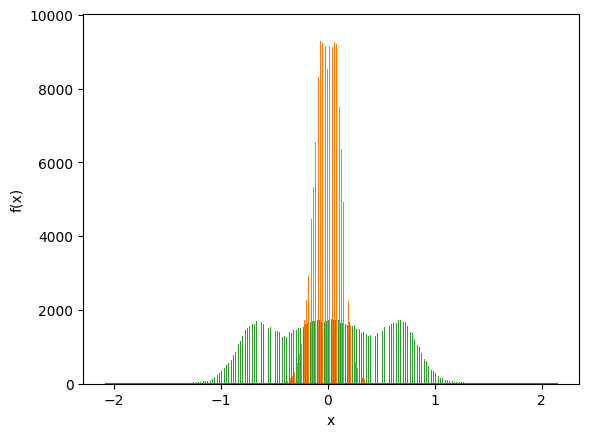

In [196]:
bimodal_reservoir.pre_train(X_TS, 0, 0)
bimodal_reservoir.predict(X_TS, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [197]:
bimodal_reservoir.reset_initial_state()

In [198]:
bimodal_reservoir.KL(X_TS[100:None])

tensor(0.1439)

In [199]:
bimodal_reservoir.pre_train(X_TR, epochs=5, eta=0.00000025)

- Epoch: 1) | KL Divergence value: 0.133005753159523. | Spectral radius: 0.7519531846046448
- Epoch: 2) | KL Divergence value: 0.12413546442985535. | Spectral radius: 0.7550020813941956
- Epoch: 3) | KL Divergence value: 0.1178920641541481. | Spectral radius: 0.7598870396614075
- Epoch: 4) | KL Divergence value: 0.1145259290933609. | Spectral radius: 0.7698724269866943
- Epoch: 5) | KL Divergence value: 0.11380521953105927. | Spectral radius: 0.7840179204940796


In [200]:
bimodal_reservoir.pre_train(X_TR, epochs=5, eta=0.000000125)

- Epoch: 1) | KL Divergence value: 0.11424637585878372. | Spectral radius: 0.7930083870887756
- Epoch: 2) | KL Divergence value: 0.11508867144584656. | Spectral radius: 0.8034934401512146
- Epoch: 3) | KL Divergence value: 0.11622237414121628. | Spectral radius: 0.8156375885009766
- Epoch: 4) | KL Divergence value: 0.11754259467124939. | Spectral radius: 0.8295989036560059
- Epoch: 5) | KL Divergence value: 0.11895838379859924. | Spectral radius: 0.8455395698547363


In [201]:
bimodal_reservoir.pre_train(X_TR, epochs=5, eta=0.000000125)

- Epoch: 1) | KL Divergence value: 0.12039526551961899. | Spectral radius: 0.8635932803153992
- Epoch: 2) | KL Divergence value: 0.12179864197969437. | Spectral radius: 0.8838900327682495
- Epoch: 3) | KL Divergence value: 0.12313488125801086. | Spectral radius: 0.9065935611724854
- Epoch: 4) | KL Divergence value: 0.12438637018203735. | Spectral radius: 0.9319083094596863
- Epoch: 5) | KL Divergence value: 0.12554876506328583. | Spectral radius: 0.960121750831604


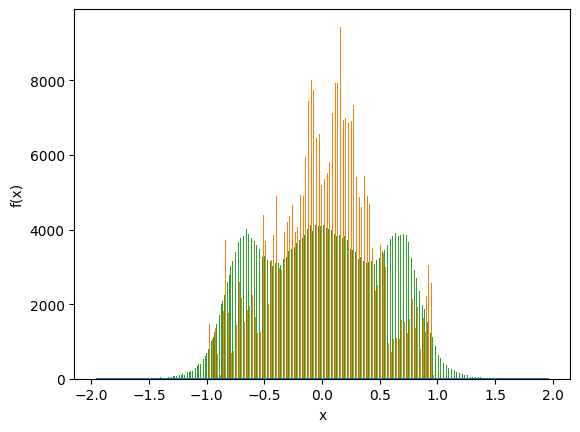

In [206]:
bimodal_reservoir.pre_train(X_TS, 0, 0)
bimodal_reservoir.predict(X_TS, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [205]:
bimodal_reservoir.pre_train(X_TR, epochs=1, eta=-0.00000005)

- Epoch: 1) | KL Divergence value: 0.1203063577413559. | Spectral radius: 0.8636565208435059


In [178]:
bimodal_reservoir.de_fi()

0.0515950046553385

In [179]:
bimodal_reservoir.LCE(X_TS)

-0.19098759

In [181]:
esn = EchoStateNetwork(bimodal_reservoir)

In [183]:
esn.train(X_TR, Y_TR, 0)

Reservoir warmed up with the first 100 time steps


C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.46201e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


array([0.2469101 , 0.25688934, 0.24906158, ..., 0.29050446, 0.25763702,
       0.24090576], dtype=float32)

In [189]:
from Metrics import MSE

tensor(0.0214, dtype=torch.float64)

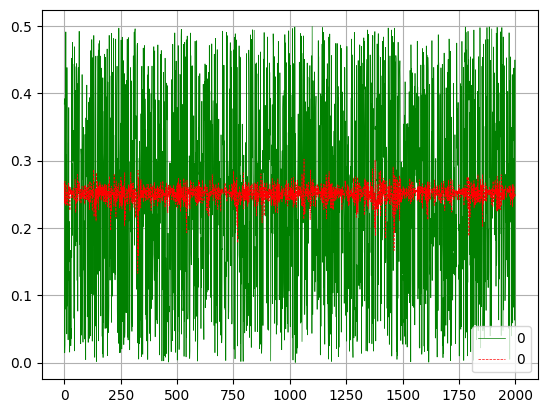

In [191]:
esn.evaluate(X_TS,Y_TS,metric=MSE(), plot=True)

EXPERIMENTS WITH OTHER STUFF

In [11]:
bimodal_dist = IPMask.mixedBimodalMask(250).sample(2000)

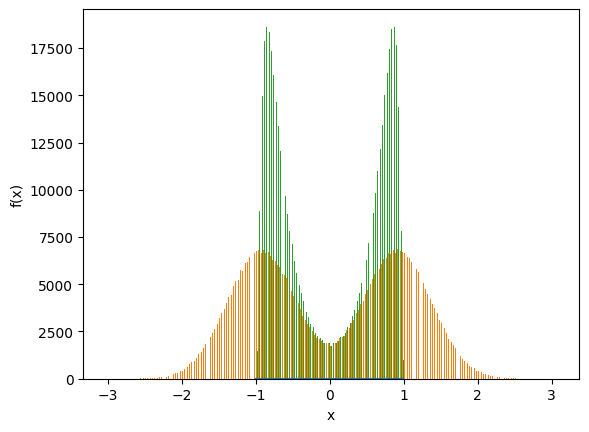

In [13]:
import numpy as np    
import matplotlib.pyplot as plt

x = bimodal_dist.flatten().numpy()
y = bimodal_reservoir.activation(bimodal_dist).flatten().numpy()

xs = np.linspace(y.min(), y.max(), 500)
ys = np.zeros_like(xs)

#plt.set_title(f"Activations of neuron {i+1}")
plt.plot(xs, ys)
plt.hist([x, y],  bins="fd", label=['Actual', 'Target'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [14]:
bimodal_dist = IPMask.normalMask(250).sample(2000)

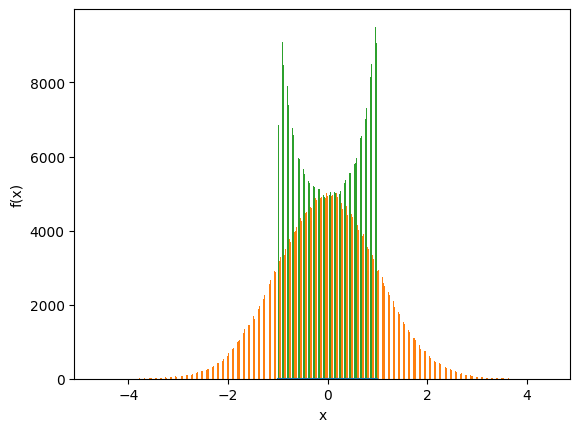

In [15]:
import numpy as np    
import matplotlib.pyplot as plt

x = bimodal_dist.flatten().numpy()
y = bimodal_reservoir.activation(bimodal_dist).flatten().numpy()

xs = np.linspace(y.min(), y.max(), 500)
ys = np.zeros_like(xs)

#plt.set_title(f"Activations of neuron {i+1}")
plt.plot(xs, ys)
plt.hist([x, y],  bins="fd", label=['Actual', 'Target'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [96]:
x_bim = IPMask.mixedBimodalMask(250, 0.08, 0.92).sample(2000)
y_bim = IPMask.mixedBimodalMask(250, 0.05, 0.7259).sample(2000)

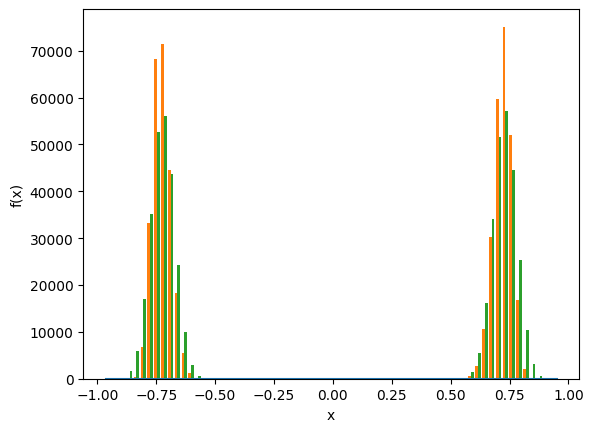

In [97]:
import numpy as np    
import matplotlib.pyplot as plt

x = bimodal_reservoir.activation(x_bim).flatten().numpy()
y = y_bim.flatten().numpy()

xs = np.linspace(y.min(), y.max(), 500)
ys = np.zeros_like(xs)

#plt.set_title(f"Activations of neuron {i+1}")
plt.plot(xs, ys)
plt.hist([x, y],  bins="fd", label=['Actual', 'Target'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [2]:
KL(torch.Tensor(x), torch.Tensor(y))/(5000*250)

NameError: name 'KL' is not defined

In [22]:
import torch
bimodal_reservoir.activation(torch.tensor([0.92]))

tensor([0.7259])

In [3]:
x_bim = IPMask.trimodal(N_UNITS, 7/10, 0.45, 0.15, 0.92).sample(5000)
y_bim = IPMask.trimodal(N_UNITS, 7/10, 0.45, 0.1, 0.7259).sample(5000)

import numpy as np    
import matplotlib.pyplot as plt

x = bimodal_reservoir.activation(x_bim).flatten().numpy()
y = y_bim.flatten().numpy()

xs = np.linspace(y.min(), y.max(), 500)
ys = np.zeros_like(xs)

#plt.set_title(f"Activations of neuron {i+1}")
plt.plot(xs, ys)
plt.hist([x, y],  bins="fd", label=['Actual', 'Target'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

NameError: name 'IPMask' is not defined

In [23]:
KL= torch.nn.KLDivLoss(reduction="batchmean", log_target = True)

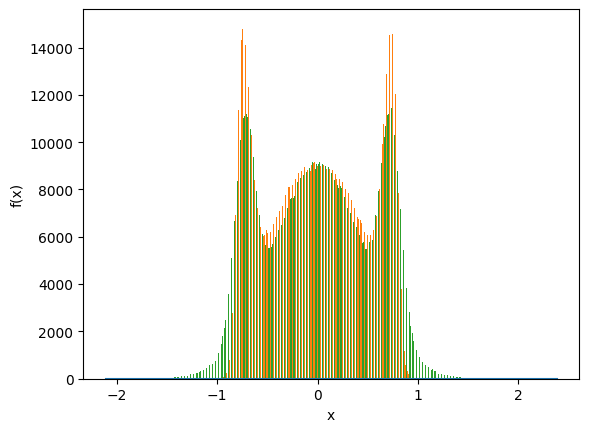

tensor(0.1631)


In [49]:
x_bim = IPMask.trimodal(N_UNITS, 7/10, 0.45, 0.15, 0.92).sample(2000)
y_bim = IPMask.trimodal(N_UNITS, 7/10, 0.45, 0.1, 0.7259).sample(2000)

import numpy as np    
import matplotlib.pyplot as plt

x = bimodal_reservoir.activation(x_bim).flatten().numpy()
y = y_bim.flatten().numpy()

xs = np.linspace(y.min(), y.max(), 500)
ys = np.zeros_like(xs)

#plt.set_title(f"Activations of neuron {i+1}")
plt.plot(xs, ys)
plt.hist([x, y],  bins="fd", label=['Actual', 'Target'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

print(KL(torch.Tensor(x), torch.Tensor(y)))

In [25]:
KL(torch.Tensor(x), torch.Tensor(y))

tensor(0.1535)

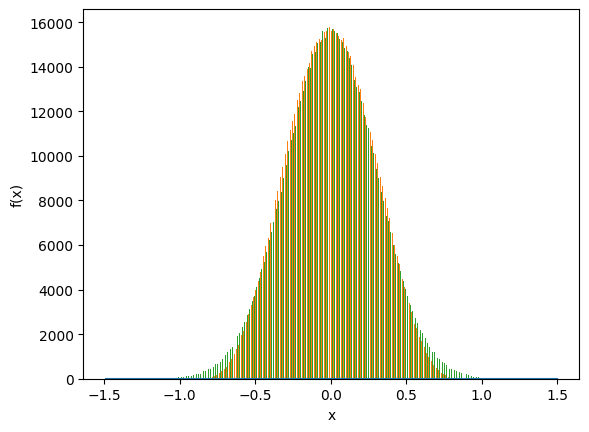

tensor(0.0940)


In [61]:
x_bim = IPMask.gaussian(N_UNITS, 0.3, 0.0).sample(5000)
y_bim = IPMask.gaussian(N_UNITS, 0.3, 0.0).sample(5000)

import numpy as np    
import matplotlib.pyplot as plt

x = bimodal_reservoir.activation(x_bim).flatten().numpy()
y = y_bim.flatten().numpy()

xs = np.linspace(y.min(), y.max(), 500)
ys = np.zeros_like(xs)

#plt.set_title(f"Activations of neuron {i+1}")
plt.plot(xs, ys)
plt.hist([x, y],  bins="fd", label=['Actual', 'Target'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

print(KL(torch.Tensor(x), torch.Tensor(y)))

In [123]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask, IPDistribution

N_UNITS = 250
W_range=(-0.5, 0.5)
ip_reservoir = IPReservoir(N = N_UNITS, ro_rescale=0.96, bias = False, mask=IPMask.gaussian(N_UNITS, 0.3, 0.0))

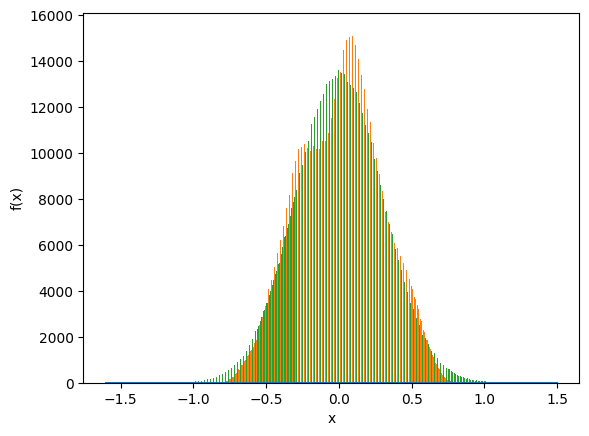

In [124]:
ip_reservoir.pre_train(X_TR, 0, 0)
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [125]:
ip_reservoir.pre_train(X_TR, epochs=5, eta=-0.000001)

- Epoch: 1) | KL Divergence value: 0.06486885249614716. | Spectral radius: 0.9464191794395447
- Epoch: 2) | KL Divergence value: 0.05774509906768799. | Spectral radius: 0.934735894203186
- Epoch: 3) | KL Divergence value: 0.05355340987443924. | Spectral radius: 0.9239922761917114
- Epoch: 4) | KL Divergence value: 0.05074622482061386. | Spectral radius: 0.9137950539588928
- Epoch: 5) | KL Divergence value: 0.04872686788439751. | Spectral radius: 0.9038864970207214


In [128]:
ip_reservoir.pre_train(X_TR, epochs=5, eta=0.000001)

- Epoch: 1) | KL Divergence value: 0.05074271187186241. | Spectral radius: 0.9137960076332092
- Epoch: 2) | KL Divergence value: 0.053540028631687164. | Spectral radius: 0.9239932894706726
- Epoch: 3) | KL Divergence value: 0.05770384147763252. | Spectral radius: 0.9347318410873413
- Epoch: 4) | KL Divergence value: 0.06476099044084549. | Spectral radius: 0.9464123249053955
- Epoch: 5) | KL Divergence value: 0.07786300778388977. | Spectral radius: 0.9599758386611938


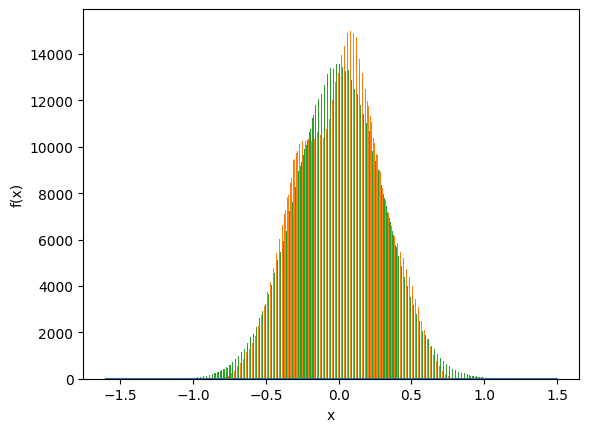

In [129]:
ip_reservoir.pre_train(X_TR, 0, 0)
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [131]:
ip_reservoir.rescale_weights(0.8)

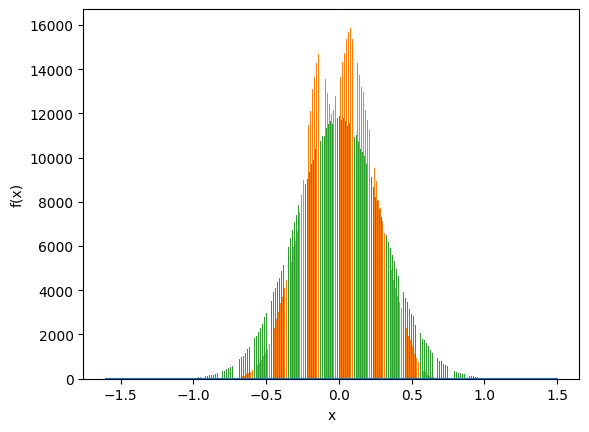

In [132]:
ip_reservoir.pre_train(X_TR, 0, 0)
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [104]:
bimodal_reservoir.rescale_weights(0.25)

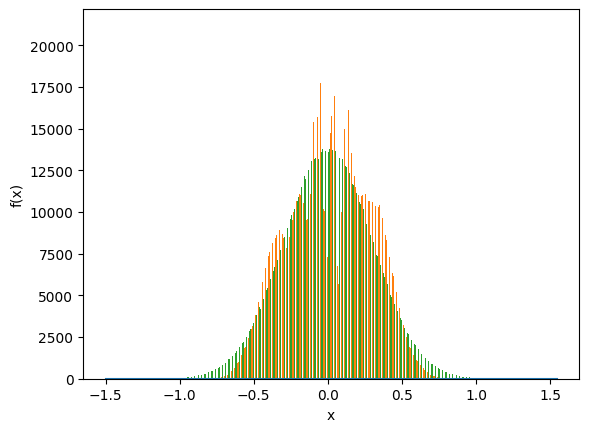

In [105]:
bimodal_reservoir.pre_train(X_TR, 0, 0)
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [106]:
bimodal_reservoir.KL(X_TR[100:None])

tensor(0.0760)